In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams['figure.figsize'] = [10, 5] #Plotgröße anpassen
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
matplotlib.rcParams['text.usetex'] = True
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)
from sympy import *
init_printing(use_latex='mathjax')
from scipy import signal
from IPython.display import display, Markdown, Latex, Math, HTML
# Enable interactive plot
#%matplotlib notebook


t,f,Rs,Ls,Cs,w,Gs,l=symbols('t,f,R´,L´,C´,\omega,G´,l',real=true)
j = I
Z_2c,Z_2,Z_L,Z_Lc,Ut,It,Ul,Il,Ult,Ilt,Ur,Uh,U_1,U_2,I_1,I_2,lam,gam=symbols(r'\underline{Z}_2,Z_2,Z_L,\underline{Z}_L,\underline{U}(t),\underline{I}(t),\underline{U}(l),\underline{I}(l),\underline{U}(l\,t),\underline{I}(l\,t),\underline{U}_r,\underline{U}_h,\underline{U}_1,\underline{U}_2,\underline{I}_1,\underline{I}_2,lambda,gamma',real=false)
ref0,ref,Z_1c,Z_1=symbols(r'\underline{r}(0),\underline{r},\underline{Z}_1,Z_1')

# Leitungstheorie
 {cite}`meinke2`

In der Leitungstheorie ist der Begin der Leitung Links. Also vom Verbraucher zum Generator hin. Strom und Spannung werden in Anhängigkeit der Position auf der Leitung $l$ angegeben.
```{figure} ./images/Leitung.jpg
:name: Leitung
:width: 400px

Strom und Spannung auf einer Leitung
```

Die Leitung kann in kleine Leitungsteile zerlegt werden.
```{figure} ./images/Leitungssegment.jpg
:name: Leitungssegment
:width: 400px

Leitungssegment
```

## Begriffe und Definitionen

| Symbol | Beschreibung  |
|--------|---:|
| $l$    |  Position auf der Leitung |
| $\underline{U}(l)$ | Spannung an der Position $l$ auf der Leitung|
| $\underline{I}(l)$ | Strom an der Position $l$ auf der Leitung|
| $\underline{U}_h (l,t)$ | Spannung an der Position $l$ zum Zeitpunkt $t$ vom Generator zum Verbraucher laufend, $h$ für hin|
| $\underline{I}_h(l,t)$ | Strom an der Position $l$ zum Zeitpunkt $t$ vom Generator zum Verbraucher laufend, $h$ für hin|
| $\underline{U}_r(l,t)$ | Spannung an der Position $l$ zum Zeitpunkt $t$ vom Generator zum Verbraucher laufend, $r$ für rück|
| $\underline{I}_r(l,t)$ | Strom an der Position $l$ zum Zeitpunkt $t$ vom Generator zum Verbraucher laufend, $r$ für rück|
| $U_1$ | Spannung am Leitungseingang|
| $U_2$ | Spannung am Leiungsausgang $U_2 = U(l=0)$|
| $R'$| Widerstandsbelag in $\frac{\Omega}{m}$|
| $L'$| Induktionsbelag in $\frac{H}{m}$|
| $G'$| Ableitungsbelag in $\frac{S}{m}$|
| $C'$| Kapazitätsbelag in $\frac{F}{m}$|
|$Z_L$| Reeler Leitungswiderstand|
|$\underline{Z}_L$| Komplexer Leitungswiderstand|
|$Z_1$| Betrag des Eingangswiderstandes|
|$\underline{Z}_1$| Komplexer Eingangswiderstand|
|$Z_2$| Betrag des Lastwiderstand|
|$\underline{Z}_2$| Komplexer Lastwiderstand|
|$\gamma$|Komplexe Ausbreitungsmaß|
|$\lambda$|Wellenlänge|
|$ r$ | Relfexionssfaktor|
|$ r(0)$ | Relfexionssfaktor Verbraucherseitig|

Die Werte der Leitungsbeläge müssen durch Messung bestimmt werden. Typische Werte können aus der Tabelle entnommen werden. {cite}`Werteleitungsbelege`  
```{figure} ./images/TabelleLeitungsbelege.png
:name: TabelleLeitungsbelege
:width: 600px

Typische Werte für Leitungsbelege {cite}`Werteleitungsbelege`  
```


### Leitungswiderstand der verlustlosen Leitung

In der allgemeinen Form ergibt sich der komplexe Leitungswiderstand aus den Leitungsbelegen.

In [2]:
Z_LcEq = Eq(Z_Lc,sqrt((Rs+j*w*Ls)/(Gs+j*w*Cs)))
display(Z_LcEq)

                      __________________
                     ╱ ⅈ⋅L´⋅\omega + R´ 
\underline{Z}_L =   ╱  ──────────────── 
                  ╲╱   ⅈ⋅C´⋅\omega + G´ 

Für den rein reelen Leitungswiderstand, welcher den Zusammenhang der hinlaufenden und der rücklaufenden Welle beschreibt vereinfacht sich die Formel.

In [3]:
Z_LEq = Eq(Z_L,sqrt(Ls/Cs))
display(Latex('$ ' + latex(Z_LEq) +  '= \\frac{\\underline{U}_h}{\\underline{I}_h}' +  '= - \\frac{\\underline{U}_r}{\\underline{I}_r}' + '$'))

<IPython.core.display.Latex object>

### Reflexionsfaktor

In [4]:
eq2=Eq(ref,Ur/Uh)
display(eq2)

                \underline{U}ᵣ
\underline{r} = ──────────────
                \underline{U}ₕ

Verbraucherseitig vereinfacht sich der Reflexionsfaktor.

In [25]:
ref0Eq = Eq(ref0,(Z_2c-Z_Lc)/(Z_2c+Z_Lc))
display(ref0Eq)

                   \underline{Z}₂ - \underline{Z}_L
\underline{r}(0) = ────────────────────────────────
                   \underline{Z}₂ + \underline{Z}_L

Normiert auf den reelen Leitungswiderstand

In [26]:
ref0Eq = Eq(ref0,(Z_2c/Z_L-1)/(Z_2c/Z_L+1))
display(ref0Eq)

                        \underline{Z}₂
                   -1 + ──────────────
                             Z_L      
\underline{r}(0) = ───────────────────
                        \underline{Z}₂
                    1 + ──────────────
                             Z_L      

### Wellenlänge

In [7]:
lamEq=Eq(lam,1/(f*sqrt(Ls*Cs)))
lamEq

         1     
λ = ───────────
        _______
    f⋅╲╱ C´⋅L´ 

## Leitungsabschlüsse

### Beliebiger Abschluss

In [8]:
eq4=Eq(Ul,U_2*cos(2*pi*l/lam)+j*I_2*Z_L*sin(2*pi*l/lam))
display(eq4)
eq5=Eq(Il,I_2*cos(2*pi*l/lam)+j*U_2/Z_L*sin(2*pi*l/lam))
display(eq5)

                                           ⎛2⋅π⋅l⎞                     ⎛2⋅π⋅l⎞
\underline{U}(l) = ⅈ⋅Z_L⋅\underline{I}₂⋅sin⎜─────⎟ + \underline{U}₂⋅cos⎜─────⎟
                                           ⎝  λ  ⎠                     ⎝  λ  ⎠

                                                                   ⎛2⋅π⋅l⎞
                                               ⅈ⋅\underline{U}₂⋅sin⎜─────⎟
                                     ⎛2⋅π⋅l⎞                       ⎝  λ  ⎠
\underline{I}(l) = \underline{I}₂⋅cos⎜─────⎟ + ───────────────────────────
                                     ⎝  λ  ⎠               Z_L            

Mit dem Zusammenhang $I_2 = \frac{U_2}{Z_2}$ kann die Gleichung für den Strom und die Spannung auf der Leitung wie folgt umgeformt werden.

In [9]:
UlEq=Eq(Ul,U_2*(cos(2*pi*l/lam)+j*Z_L/Z_2c*sin(2*pi*l/lam)))
display(UlEq)
IlEq=Eq(Il,I_2*(cos(2*pi*l/lam)+j*Z_2c/Z_L*sin(2*pi*l/lam)))
display(IlEq)

                                  ⎛         ⎛2⋅π⋅l⎞             ⎞
                                  ⎜ⅈ⋅Z_L⋅sin⎜─────⎟             ⎟
                                  ⎜         ⎝  λ  ⎠      ⎛2⋅π⋅l⎞⎟
\underline{U}(l) = \underline{U}₂⋅⎜──────────────── + cos⎜─────⎟⎟
                                  ⎝ \underline{Z}₂       ⎝  λ  ⎠⎠

                                  ⎛                                 ⎛2⋅π⋅l⎞⎞
                                  ⎜             ⅈ⋅\underline{Z}₂⋅sin⎜─────⎟⎟
                                  ⎜   ⎛2⋅π⋅l⎞                       ⎝  λ  ⎠⎟
\underline{I}(l) = \underline{I}₂⋅⎜cos⎜─────⎟ + ───────────────────────────⎟
                                  ⎝   ⎝  λ  ⎠               Z_L            ⎠

#### Grafische Darstellung

Damit kann die Spannung und der Strom über die Leitung angezeigt werden. Die hier angeführten Werte passen in etwa zu einem Koaxialkabel mit vernachlässigten ohmschen Verlusten.
```{tip}
Durch anklicken der Rakete rechts oben und anschließendem öffnen des Notebooks in Binder wird das Notebook interaktiv! Verschiedene Ergebnisse für verscheidene Werte können damit betrachtet werden.
```

In [10]:
LsN=2.5 * 10**-9*10**2 # H/m
CsN=1 * 10**-12*10**2 # F/m
RsN=0.01 # Ohm/m
GsN=0.01 # S/m
fN=10**6 # Hz
Z_2cN= 50 + j*100  #Ohm
I_2N=1 #A

In [11]:
Z_2N = abs(Z_2cN)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

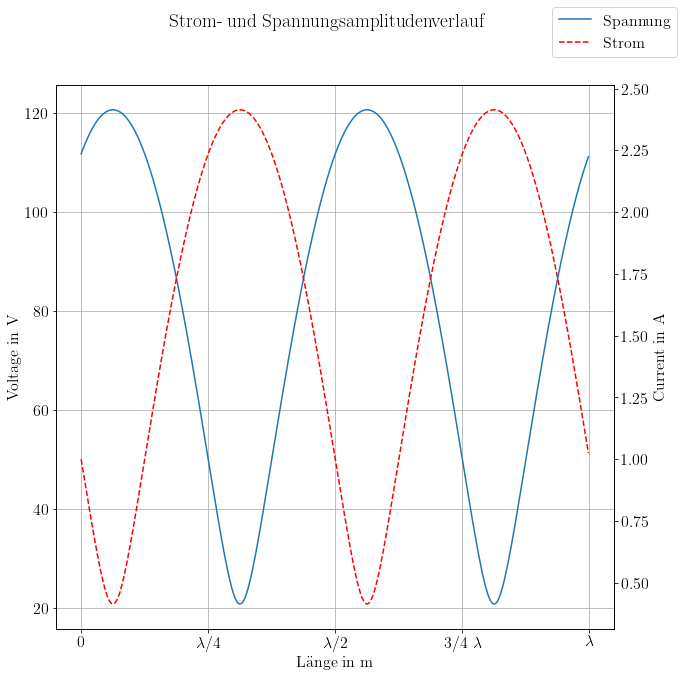

In [12]:
def plot_wire(lamEq,Z_LEq,UlEq,IlEq,LsN,CsN,RsN,GsN,fN,Z_2N,I_2N,**kwargs):
    tN = 0
    for key, value in kwargs.items():
        if key == 'tN':
            tN = value
            break
                
    wN=2*np.pi*fN
    U_2N=I_2N*Z_2N

    lamN = float(lamEq.rhs.subs({Cs:CsN,Ls:LsN,f:fN}))
    display(Latex('$ \\lambda = ' + str(lamN) + '\ \\textrm{m}$'))
    
    Z_LcEqN = (Z_LcEq.rhs.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN}))
    display(Latex('$ \\underline{Z}_L = (' + str("{:10.2f}".format(re(Z_LcEqN.evalf()))) + ' + j \cdot '+ str("{:10.2f}".format(im(Z_LcEqN.evalf()))) + ') \ \Omega $'))
    
    Z_LEqN = (Z_LEq.rhs.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN}))
    display(Latex('$ Z_L = ' + str("{:10.2f}".format((Z_LEqN.evalf())))  + ' \ \Omega $'))
    
    #display(ref0Eq.rhs)
    #display(Z_2N)
    ref0N = abs(ref0Eq.rhs.subs({Z_2:Z_2N,Z_2c:Z_2cN,Z_L:Z_LEqN}))
    #display(ref0N)
    try:
        display(Latex('$ | r(0) | = ' + str("{:10.4f}".format(ref0N.evalf())) + ' $'))
    except Exception as e:
        if ref0N == 0:
            display(Latex('$ | r(0) | = ' + str(0) + ' $'))
        else:
            print(e)
            
    ref0phaseN = arg(ref0Eq.rhs.subs({Z_2:Z_2N,Z_2c:Z_2cN,Z_L:Z_LEqN}))
    display(Latex('$ | r(0) | = ' + str("{:10.1f}".format((ref0phaseN*180/pi).evalf())) + ' \ °$'))

    l_array = np.arange(0,lamN,lamN/500) #generate array
    #print(l_array)

    # Voltage
    eq9 = abs(UlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
    #display(eq9)
    eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:Z_2cN,U_2:U_2N,f:fN,t:tN})
    #display(eq10)

    UlN=lambdify(l, (eq10),"numpy") #convert sympy to numpy
    #print(UlN(l_array))

    #Current
    eq11 = abs(IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
    #display(eq11)
    eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:Z_2cN,U_2:U_2N,f:fN,I_2:I_2N,t:tN})
    #display(eq12)

    IlN=lambdify(l, (eq12),"numpy") #convert sympy to numpy
    #print(UlN(l_array))

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 10)
    fig.suptitle('Strom- und Spannungsamplitudenverlauf')
    ax2 = ax1.twinx()

    p1 = ax1.plot(l_array,UlN(l_array),label='Spannung')
    ax1.set_ylabel('Voltage in V')
    ax1.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])
    ax1.grid()
    #ax1.legend('Spannung',loc=7,)
    ax1.invert_xaxis()

    p2 = ax2.plot(l_array,IlN(l_array),'r--',label='Strom')
    ax2.set_ylabel('Current in A')
    #ax2.legend('Strom',)
    ax2.invert_xaxis()
    #ax1.legend([p1,p2],['Spannung','Strom'])
    fig.legend()
    fig.show()
    
plot_wire(lamEq,Z_LEq,UlEq,IlEq,LsN,CsN,RsN,GsN,fN,Z_2N,I_2N)

### Welle im zeitlichen Verlauf
Um die Zeitabhängigkeit zu erhalten müssen die Gleichungen mit $e^{j\cdot \omega \cdot t}$ multipliziert werden.

In [13]:
eq20=Eq(Ult,Ul*exp(j*w*t))
display(eq20)
eq21=Eq(Ilt,Il*exp(j*w*t))
display(eq21)
UltEq = eq20.subs(Ul,UlEq.rhs)
IltEq = eq21.subs(Il,IlEq.rhs)

                                       ⅈ⋅\omega⋅t
\underline{U}(l,t) = \underline{U}(l)⋅ℯ          

                                       ⅈ⋅\omega⋅t
\underline{I}(l,t) = \underline{I}(l)⋅ℯ          

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

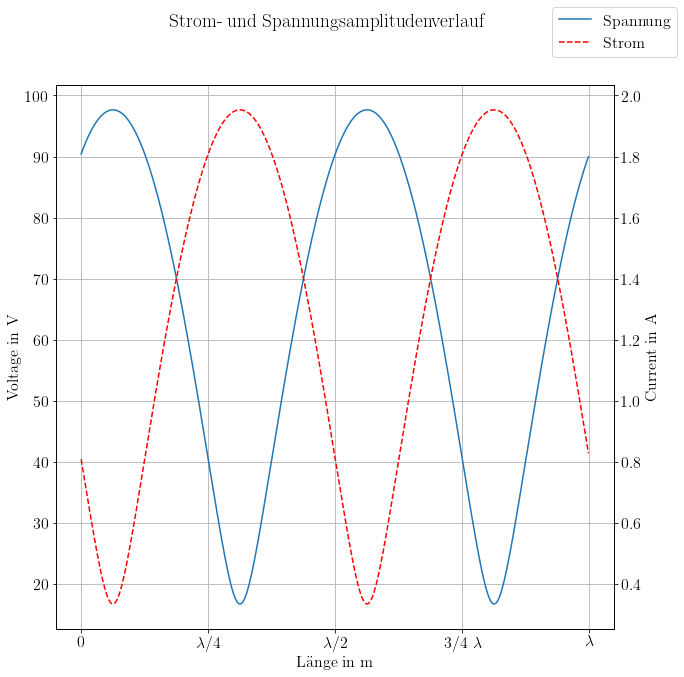

In [14]:
plot_wire(lamEq,Z_LEq,UltEq,IltEq,LsN,CsN,RsN,GsN,fN,Z_2N,I_2N,tN=1/(10*fN))

In [15]:
wN=2*np.pi*fN
U_2N=I_2N*Z_2N



lamN = float(lamEq.rhs.subs({Cs:CsN,Ls:LsN,f:fN}))
display(Latex('$ \\lambda = ' + str(lamN) + '\ \\textrm{m}$'))

Z_LcEqN = (Z_LcEq.rhs.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN}))
display(Latex('$ \\underline{Z}_L = (' + str("{:10.2f}".format(re(Z_LcEqN.evalf()))) + ' + j \cdot '+ str("{:10.2f}".format(im(Z_LcEqN.evalf()))) + ') \ \Omega $'))

Z_LEqN = (Z_LEq.rhs.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN}))
display(Latex('$ Z_L = ' + str("{:10.2f}".format((Z_LEqN.evalf())))  + ' \ \Omega $'))

ref0N = abs(ref0Eq.rhs.subs({Z_2:Z_2N,Z_2c:Z_2cN,Z_L:Z_LEqN}))
#display(ref0N)
try:
    display(Latex('$ | r(0) | = ' + str("{:10.4f}".format(ref0N.evalf())) + ' $'))
except Exception as e:
    if ref0N == 0:
        display(Latex('$ | r(0) | = ' + str(0) + ' $'))
    else:
        print(e)

ref0phaseN = arg(ref0Eq.rhs.subs({Z_2:Z_2N,Z_2c:Z_2cN,Z_L:Z_LEqN}))
display(Latex('$ | r(0) | = ' + str("{:10.1f}".format((ref0phaseN*180/pi).evalf())) + ' \ °$'))
    
l_array = np.arange(0,lamN,lamN/500) #generate array
dt = 1/(fN*100)
t_array =np.arange(0,1/fN,dt)
#print(l_array)
#print(t_array)

 # Voltage
eq9 = abs(UlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
#display(eq9)
eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:Z_2cN,U_2:U_2N,f:fN,t:0})
#display(eq10)

UlN=lambdify(l, (eq10),"numpy") #convert sympy to numpy
#print(UlN(l_array))

#Current
eq11 = abs(IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
#display(eq11)
eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:Z_2cN,U_2:U_2N,f:fN,I_2:I_2N,t:0})
#display(eq12)

IlN=lambdify(l, (eq12),"numpy") #convert sympy to numpy
#print(UlN(l_array))

fig, ax1 = plt.subplots(1, 1)
ax2 = ax1.twinx()

ax1.set(xlim=(0, lamN), ylim=(-max(UlN(l_array)), max(UlN(l_array))),label='Spannung')
ax1.grid()
ax1.invert_xaxis
line1, = ax1.plot([], [], 'b', lw=2)
text = ax1.text(3/4*lamN, 2.05, '')
ax1.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])
ax1.set_ylabel('Voltage in V')

ax2.set(xlim=(0, lamN), ylim=(-max(IlN(l_array)), max(IlN(l_array))),label='Strom')
ax2.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])
line2, = ax2.plot([], [], 'r--', lw=2)
ax2.invert_xaxis()
ax2.set_ylabel('Strom in A')

#fig.legend()
#fig.show()

time_template = 'time = %.2e $\mu $s'

def init():
#    line, = ax.plot([], [], 'b', lw=2)
    return line1, line2, text

def animate(i):
    tN = t_array[i]
    #print(i)
    #print(tN)
    x = l_array
    
    #display(eq9)
    eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:Z_2cN,U_2:U_2N,f:fN,t:tN})
    #display(eq10)

    UlN=lambdify(l, (eq10),"numpy") #convert sympy to numpy
    #print(UlN(l_array))
    
    y1 = UlN(l_array)
    
    #Current
    eq11 = abs(IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
    #display(eq11)
    eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:Z_2cN,U_2:U_2N,f:fN,I_2:I_2N,t:tN})
    #display(eq12)

    IlN=lambdify(l, (eq12),"numpy") #convert sympy to numpy
    #print(UlN(l_array))
    
    y2 = IlN(l_array)
    
       
    
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    text.set_text(time_template % (i*(10**6)*dt))
    return line1, line2, text

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(t_array)),interval=50, blit=True, init_func=init)

plt.close()

HTML(anim.to_jshtml())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Welle in Abhängigkeit des Lastwiderstandes

In [16]:
wN=2*np.pi*fN
U_2N=I_2N*Z_2N



lamN = float(lamEq.rhs.subs({Cs:CsN,Ls:LsN,f:fN}))
display(Latex('$ \\lambda = ' + str(lamN) + '\ \\textrm{m}$'))

Z_LcEqN = (Z_LcEq.rhs.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN}))
display(Latex('$ \\underline{Z}_L = (' + str("{:10.2f}".format(re(Z_LcEqN.evalf()))) + ' + j \cdot '+ str("{:10.2f}".format(im(Z_LcEqN.evalf()))) + ') \ \Omega $'))

Z_LEqN = (Z_LEq.rhs.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN}))
display(Latex('$ Z_L = ' + str("{:10.2f}".format((Z_LEqN.evalf())))  + ' \ \Omega $'))

ref0N = abs(ref0Eq.rhs.subs({Z_2:Z_2N,Z_2c:Z_2cN,Z_L:Z_LEqN}))
#display(Latex('$ | r(0) | = ' + str("{:10.4f}".format(ref0N.evalf())) + ' $'))

l_array = np.arange(0,lamN,lamN/500) #generate array
dt = 1/(fN*100)
t_array =np.arange(0,1/fN,dt)

Z_2_data = np.arange(0.01,10*Z_LEqN.evalf(),1/10*Z_LEqN.evalf())

#Z_2c_array = Z_2_data + j*Z_2_data
Z_2c_array = Z_2_data
#print(l_array)
#print(t_array)
#print(Z_2_array)


eq9 = (UlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))
#display(eq9)
eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:90+90*I,U_2:I_2N*Z_2cN,f:fN,t:0})
#display(eq10)

UlN=lambdify(l, abs(eq10),"numpy") #convert sympy to numpy

#print(UlN(l_array))

#Current
eq11 = (IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))
#display(eq11)
eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:100+100*I,U_2:I_2N*Z_2cN,f:fN,I_2:I_2N,t:0})
#display(eq12)

IlN=lambdify(l, abs(eq12),"numpy") #convert sympy to numpy
#print(UlN(l_array))


fig, ax1 = plt.subplots(1, 1)
ax2 = ax1.twinx()

#ax1.set(xlim=(0, lamN), ylim=(-max(UlN(l_array)), max(UlN(l_array))))
ax1.set(xlim=(0, lamN), ylim=(0, 200))
ax1.grid()
ax1.invert_xaxis
line1, = ax1.plot([], [], 'b', lw=2)
text = ax1.text(3/4*lamN, 2.05, '')
ax1.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])

ax2.set(xlim=(0, lamN), ylim=(-max(IlN(l_array)), max(IlN(l_array))))
ax2.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])
line2, = ax2.plot([], [], 'r--', lw=2)
ax2.invert_xaxis()

ax1.set_ylabel('Voltage in V')
ax2.set_ylabel('Strom in A')

text_template = '$|r(0)|$ = %.2f'

def init():
#    line, = ax.plot([], [], 'b', lw=2)
    return line1, line2, text

def animate(i):
    tN = 0
    Z_2cN = Z_2c_array[i]
    Z_2N = abs(Z_2cN)
    U_2N=I_2N*Z_2cN
    #print(i)
    #print(Z_2N)
    x = l_array
    
    # Voltage
    eq9 = (UlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))
    #display(eq9)
    eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:Z_2cN,U_2:I_2N*Z_2cN,f:fN,t:tN})
    #display(eq10)

    UlN=lambdify(l, abs(eq10),"numpy") #convert sympy to numpy
    #print(UlN(l_array))
    
    y1 = UlN(l_array)

    #Current
    eq11 = (IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))
    #display(eq11)
    eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2c:Z_2cN,U_2:I_2N*Z_2cN,f:fN,I_2:I_2N,t:tN})
    #display(eq12)

    IlN=lambdify(l, abs(eq12),"numpy") #convert sympy to numpy
    #print(UlN(l_array))
        
    y2 = IlN(l_array)
    
    ref0N = abs(ref0Eq.rhs.subs({Z_2:Z_2N,Z_2c:Z_2cN,Z_L:Z_LEqN}))
    
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    text.set_text(text_template % (ref0N))
    return line1, line2, text

anim = animation.FuncAnimation(fig, animate, np.arange(0, len(Z_2c_array)),interval=25, blit=True, init_func=init)

plt.close()

HTML(anim.to_jshtml())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Leitungstranformation und Leitungsanpassung
Unter transformation ist zu verstehen wie die Leitung und der Abschluss der Leitung sich auf den Leitungseingang auswirken. Die Betrachtung erfolgt analog zur Vierpoltheorie. Auf die herleitung der Transformationsgleichung aus der $A$ Vierpolmatrix soll an dieser Stelle verzichtet werden.

In [17]:
Z_1cEq = Eq(Z_1c,Z_L*(Z_2c/Z_L+j*tan(2*pi*l/lam))/(1+j*Z_2c/Z_L*tan(2*pi*l/lam)))
display(Z_1cEq)

                     ⎛     ⎛2⋅π⋅l⎞   \underline{Z}₂⎞
                 Z_L⋅⎜ⅈ⋅tan⎜─────⎟ + ──────────────⎟
                     ⎝     ⎝  λ  ⎠        Z_L      ⎠
\underline{Z}₁ = ───────────────────────────────────
                                           ⎛2⋅π⋅l⎞  
                       ⅈ⋅\underline{Z}₂⋅tan⎜─────⎟  
                                           ⎝  λ  ⎠  
                   1 + ───────────────────────────  
                                   Z_L              

### Spezialfall Kurzschluss am Ausgang

In [18]:
Z_1cshortedEq=Eq(Z_1c,limit(Z_1cEq.rhs,Z_2c,0))
display(Z_1cshortedEq)

                          ⎛2⋅π⋅l⎞
\underline{Z}₁ = ⅈ⋅Z_L⋅tan⎜─────⎟
                          ⎝  λ  ⎠

### Spezialfall Leerlauf am Ausgang

In [19]:
Z_1copenEq=Eq(Z_1c,limit(Z_1cEq.rhs,Z_2c,oo))
display(Z_1copenEq)

                  -ⅈ⋅Z_L   
\underline{Z}₁ = ──────────
                    ⎛2⋅π⋅l⎞
                 tan⎜─────⎟
                    ⎝  λ  ⎠

### Spezialfall $\frac{\lambda}{4}$ Leiter

In [20]:
Z_1clam4Eq=Eq(Z_1c,limit(Z_1cEq.rhs,l,lam/4))
display(Z_1clam4Eq)

                         2     
                      Z_L      
\underline{Z}₁ = ──────────────
                 \underline{Z}₂

#### $\frac{\lambda}{4}$ Leiter Kurzgeschlossen
$\underline{Z}_2 = 0 \ \Omega$.   
$\underline{Z}_1$ geht gegen $\infty$. Das bedeutet, dass eine Quelle am Eingang quais im Leerlauf arbeitet.

In [21]:
Z_1clam4shortedEq=Eq(Z_1c,limit(Z_1clam4Eq.rhs,Z_2c,0))
display(Z_1clam4shortedEq)

                       ⎛   2⎞
\underline{Z}₁ = ∞⋅sign⎝Z_L ⎠

#### $\frac{\lambda}{4}$ Leiter Leerlauf
$\underline{Z}_2 = $\infty$ \ \Omega$.   
$\underline{Z}_1$ geht gegen $0$. Das bedeutet, dass eine Quelle am Eingang quasi Kurzgeschlossen wird.

In [22]:
Z_1clam4openEq=Eq(Z_1c,limit(Z_1clam4Eq.rhs,Z_2c,oo))
display(Z_1clam4openEq)

\underline{Z}₁ = 0

### Spezialfall $\frac{\lambda}{2}$ Leiter

In [23]:
Z_1clam2Eq=Eq(Z_1c,limit(Z_1cEq.rhs,l,lam/2))
display(Z_1clam2Eq)

\underline{Z}₁ = \underline{Z}₂